In [1]:
import csv
from dataclasses import dataclass, field, asdict, astuple
from typing import List
import math

In [2]:
def importCSV(_path):
    with open(_path,'r') as f:
        reader  = csv.reader(f)

        res = [x for x in reader]
    return res

In [3]:
def exportCSV(_filename, _datas):
    f = open(_filename, 'w', newline='')
    csv_writer = csv.writer(f)
    
    for x in _datas:
        csv_writer.writerow(x)
    f.close()

In [4]:
input_path = 'AISC15w.csv'
output_path = ''

In [5]:
dfAISC = importCSV(input_path)
dfAISC.pop(0)

['ID', 'h', 'bf', 'tw', 'tf', 'k']

In [6]:
@dataclass
class PreSection:
    ID: str
    h: str
    bf: str
    tw: str
    tf: str
    k: str
    
preSect1 = PreSection(*dfAISC[0]) ##결과 확인용 코드

preSects = [PreSection(*x) for x in dfAISC] ##결과 확인용 코드

preSects ##결과 확인용 코드

[PreSection(ID='W44X335', h='1120', bf='404', tw='26.2', tf='45', k='65'),
 PreSection(ID='W44X290', h='1110', bf='401', tw='22', tf='40.1', k='59.9'),
 PreSection(ID='W44X262', h='1100', bf='401', tw='19.9', tf='36.1', k='55.9'),
 PreSection(ID='W44X230', h='1090', bf='401', tw='18', tf='31', k='51.1'),
 PreSection(ID='W40X655', h='1110', bf='429', tw='50', tf='89.9', k='120'),
 PreSection(ID='W40X593', h='1090', bf='424', tw='45.5', tf='82', k='112'),
 PreSection(ID='W40X503', h='1070', bf='417', tw='39.1', tf='70.1', k='100'),
 PreSection(ID='W40X431', h='1050', bf='411', tw='34', tf='59.9', k='89.9'),
 PreSection(ID='W40X397', h='1040', bf='409', tw='31', tf='55.9', k='85.9'),
 PreSection(ID='W40X372', h='1030', bf='409', tw='29.5', tf='52.1', k='82'),
 PreSection(ID='W40X362', h='1030', bf='406', tw='28.4', tf='51.1', k='81'),
 PreSection(ID='W40X324', h='1020', bf='404', tw='25.4', tf='46', k='75.9'),
 PreSection(ID='W40X297', h='1010', bf='401', tw='23.6', tf='41.9', k='71.9'),


In [7]:
class PostSection():
    header = ["Section ID", "Area(mm2)", "Weight", "Ix(mm4)", 
              "Sx(mm3)", "Zx(mm3)", "rx(mm)", "Iy(mm4)", 
              "Sy(mm3)", "Zy(mm3)", "ry(mm)", "Cw(mm6)", 
              "J(mm4)", "rts(mm)", "Slenderness of Flange", "Slenderness of Web"]
    
    def __init__(self, preSect):
        fy = 345
        E = 200000
        self.fy = fy
        self.E = E
        
        def chkSlenderness(mode):
            if mode == 'flange':
                if self.bf/(2*self.tf) < 0.56*(E/fy)**0.5:
                    return "nonslender"
                else:
                    return "slender"

            elif mode == 'web':
                if (self.h-2*self.k)/self.tw < 1.49*(E/fy)**0.5:
                    return "nonslender"
                else:
                    return "slender"
            else:
                pass
            
        #self.preSect = preSect
        self.ID = preSect.ID
        self.h = float(preSect.h)
        self.bf = float(preSect.bf)
        self.tw = float(preSect.tw)
        self.tf = float(preSect.tf)
        self.k = float(preSect.k)

        self.Area = 2*self.tf*self.bf+(self.h-2*self.tf)*self.tw
        self.Weight = self.Area*77.22/10**6
        self.Ix = (2*(self.bf*self.tf**3/12+self.bf*self.tf*((self.h-2*self.tf)/2+self.tf/2)**2)+self.tw*(self.h-2*self.tf)**3/12)
        self.Sx = self.Ix/(self.h/2)
        self.Zx = self.bf*self.tf*(self.h-self.tf)+0.25*(self.h-2*self.tf)**2*self.tw
        self.rx = (self.Ix/self.Area)**0.5
        self.Iy = 2*(self.tf*(self.bf)**3/12)+(self.h-2*self.tf)*(self.tw)**3/12
        self.Sy = self.Iy/(self.bf/2)
        self.Zy = 0.5*(self.bf)**2*self.tf+0.25*(self.h-2*self.tf)*(self.tw)**2
        self.ry = (self.Iy/self.Area)**0.5
        self.Cw = (self.h-self.tf)**2*self.bf**3*self.tf/24
        self.J = (2*self.bf*self.tf**3+(self.h-self.tf)*self.tw**3)/3
        self.rts = ((self.Iy*self.Cw)**0.5/self.Sx)**0.5
        self.Slnd_Flange = chkSlenderness("flange")
        self.Slnd_Web = chkSlenderness("web")
        
        self.row = [self.ID,
            self.Area,
            self.Weight,
            self.Ix,
            self.Sx,
            self.Zx,
            self.rx,
            self.Iy,
            self.Sy,
            self.Zy,
            self.ry,
            self.Cw,
            self.J,
            self.rts,
            self.Slnd_Flange,
            self.Slnd_Web,]
    
    def __repr__(self):
        return str(
            [self.ID,
            self.Area,
            self.Weight,
            self.Slnd_Flange,
            self.Slnd_Web,]
        )


In [8]:
postSect1 = PostSection(preSect1)

In [9]:
PostSection.header

['Section ID',
 'Area(mm2)',
 'Weight',
 'Ix(mm4)',
 'Sx(mm3)',
 'Zx(mm3)',
 'rx(mm)',
 'Iy(mm4)',
 'Sy(mm3)',
 'Zy(mm3)',
 'ry(mm)',
 'Cw(mm6)',
 'J(mm4)',
 'rts(mm)',
 'Slenderness of Flange',
 'Slenderness of Web']

In [10]:
postSect1

['W44X335', 63346.0, 4.89157812, 'nonslender', 'slender']

In [11]:
postSect1.ID

'W44X335'

In [12]:
postSect1.Slnd_Flange

'nonslender'

In [13]:
postSects = [PostSection(x) for x in preSects]

# list(postSects)
postSects

[['W44X335', 63346.0, 4.89157812, 'nonslender', 'slender'],
 ['W44X290', 54815.8, 4.232876076, 'nonslender', 'slender'],
 ['W44X262', 49405.42, 3.8150865324, 'nonslender', 'slender'],
 ['W44X230', 43366.0, 3.34872252, 'nonslender', 'slender'],
 ['W40X655', 123644.20000000001, 9.547805124, 'nonslender', 'nonslender'],
 ['W40X593', 111669.0, 8.62308018, 'nonslender', 'nonslender'],
 ['W40X503', 94818.57999999999, 7.321890747599999, 'nonslender', 'nonslender'],
 ['W40X431', 80864.6, 6.244364412, 'nonslender', 'nonslender'],
 ['W40X397', 74500.4, 5.752920887999999, 'nonslender', 'nonslender'],
 ['W40X372', 69928.9, 5.3999096579999994, 'nonslender', 'nonslender'],
 ['W40X362', 67842.72, 5.2388148384, 'nonslender', 'nonslender'],
 ['W40X324', 60739.2, 4.690281023999999, 'nonslender', 'nonslender'],
 ['W40X297', 55462.119999999995, 4.2827849064, 'nonslender', 'slender'],
 ['W40X277', 51778.979999999996, 3.9983728355999992, 'nonslender', 'slender'],
 ['W40X249', 46673.18, 3.6041029596, 'nonsle

In [14]:
dfOut = [PostSection.header]+[x.row for x in postSects]

In [15]:
dfOut

[['Section ID',
  'Area(mm2)',
  'Weight',
  'Ix(mm4)',
  'Sx(mm3)',
  'Zx(mm3)',
  'rx(mm)',
  'Iy(mm4)',
  'Sy(mm3)',
  'Zy(mm3)',
  'ry(mm)',
  'Cw(mm6)',
  'J(mm4)',
  'rts(mm)',
  'Slenderness of Flange',
  'Slenderness of Web'],
 ['W44X335',
  63346.0,
  4.89157812,
  12896554283.333334,
  23029561.220238097,
  26492395.0,
  451.2084736087665,
  496088169.1533333,
  2455882.025511551,
  3849118.3,
  88.49522479169455,
  142876991175000.0,
  30987527.53333333,
  107.51955536379717,
  'nonslender',
  'slender'],
 ['W44X290',
  54815.8,
  4.232876076,
  11209808318.219332,
  20197852.825620417,
  23036783.21,
  452.2163026626787,
  431863135.8833333,
  2153930.852285952,
  3348665.85,
  88.7605916872622,
  123325425857382.95,
  21035406.134000003,
  106.89246389731599,
  'nonslender',
  'slender'],
 ['W44X262',
  49405.42,
  3.8150865324,
  9996290342.73273,
  18175073.350423146,
  20656577.669,
  449.8131349324051,
  388636865.98768336,
  1938338.483729094,
  3004212.8195,
  88.692

In [16]:
exportCSV("20220616_slenderness.csv", dfOut)

In [17]:
targetSection = list(filter(lambda x: x.ID == "W14X132", postSects))[0]

targetSection

['W14X132', 24803.04, 1.9152907488, 'nonslender', 'nonslender']

In [18]:
class EffectiveLength(): ## _length 인수로는 x축 y축 순서로 비지지길이를 입력하면 됨(동일할 경우 1개만 입력 가능)
    def __init__(self, mode, cond, *_length):
        factorTable = {
            "a": (0.5, 0.65),
            "b": (0.7, 0.80),
            "c": (1.0, 1.2),
            "d": (1.0, 1.0),
            "e": (2.0, 2.1),
            "f": (2.0, 2.0),
        }
        
        if len(_length) == 1:
            self.length_x = _length[0]
            self.length_y = _length[0]
        elif len(_length) ==2:
            self.length_x = _length[0]
            self.length_y = _length[1]
        
        self.length = (self.length_x, self.length_y)
        self.factorK = None
        
        if mode == "theoretical":
            self.factorK = factorTable[cond][0]
            
        elif mode == "recommended":
            self.factorK = factorTable[cond][1]
            
        else:
            self.factorK = 'Please select mode("theoretical" or "recommended")'

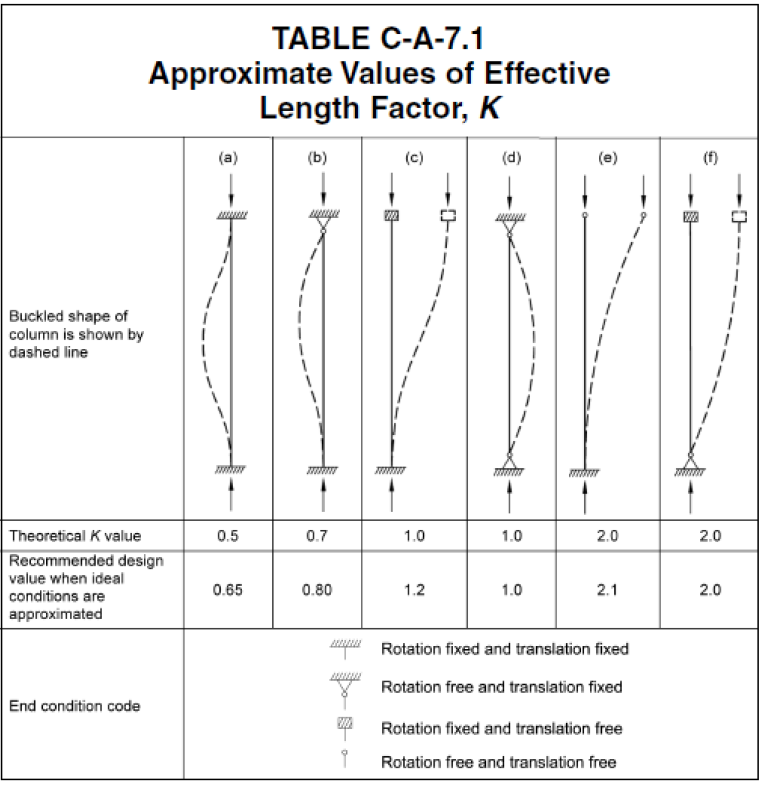

In [19]:
effLength = EffectiveLength("recommended","d" ,9144, 4572) ## 실무에서는 축마다 컨디션 지정할 필요는 없어보이나 필요하면 추후 구현
effLength.length_y

4572

In [20]:
class DesignBase():
    
    def __init__(self, _load, _postSect, _effLength):
        self._load = _load
        self._postSect = _postSect
        self._effLength = _effLength
        self.fy = _postSect.fy
        self.E = _postSect.E
        self.Ag = _postSect.Area
        
    def find_Lc(self):  ### 축방향 별로 유효길이 다른 것 구현해야 함###
        Lc_x = self._effLength.factorK * self._effLength.length_x
        Lc_y = self._effLength.factorK * self._effLength.length_y
        return (Lc_x, Lc_y)
    
    def find_r(self):
        rx = self._postSect.rx
        ry = self._postSect.ry
        return (rx, ry)
    
    def find_Lc_r(self):
        Lc_rx = self.find_Lc()[0]/self.find_r()[0]
        Lc_ry = self.find_Lc()[1]/self.find_r()[1]
        return (Lc_rx, Lc_ry)
    
    def find_Fe(self):
        r = self.find_r()
        Lc_rx = self.find_Lc_r()[0]
        Lc_ry = self.find_Lc_r()[1]
#        Fe = math.pi**2*self.E/(max(self.find_Lc_r()))**2
        Fe_x = math.pi**2*self.E/Lc_rx**2
        Fe_y = math.pi**2*self.E/Lc_ry**2
#         return Fe
        return (Fe_x,Fe_y)
        
    def find_Fcr(self):
#         Fe = self.find_Fe()
#         if max(self.find_Lc_r()) > 4.71*(self.E/self.fy)**0.5:
#             return 0.877*Fe
#         else:
#             return 0.658**(self.fy/Fe)*self.fy

        Fe_x = self.find_Fe()[0]
        Fe_y = self.find_Fe()[1]
        
        if self.find_Lc_r()[0] > 4.71*(self.E/self.fy)**0.5:
            Fcr_x = 0.877*Fe_x
        else:
            Fcr_x = 0.658**(self.fy/Fe_x)*self.fy
        
        if self.find_Lc_r()[1] > 4.71*(self.E/self.fy)**0.5:
            Fcr_y = 0.877*Fe_y
        else:
            Fcr_y = 0.658**(self.fy/Fe_y)*self.fy
            
        return min(Fcr_x, Fcr_y)
    
    def find_ϕPn(self):
        return 0.9 * self.find_Fcr() * self.Ag/1000
        
    def compression_check(self):
        slenderness_flange = self._postSect.Slnd_Flange
        slenderness_web = self._postSect.Slnd_Web
        def chk_result():
            if self.find_ϕPn() > self._load:
                return "O.K."
            else:
                return "N.G."
        
        if slenderness_flange == "nonslender" and slenderness_web == "nonslender":
            return [f"ϕPn: {self.find_ϕPn()}KN", f"loading: {self._load}", f"result: {chk_result()}"]
        else:
            return "추후 필요시 구현할 예정입니다."
        

In [21]:
effLength1 = EffectiveLength("recommended", "d", 9144, 4572)
effLength1.length_y

4572

In [22]:
res1 = DesignBase(3737, targetSection, effLength1)

res1.find_Lc()
print(res1.find_Fe())
print(res1.find_Fcr())

(603.2885323944414, 863.2065207244228)
271.5618284599082


In [23]:
res1.compression_check()

['ϕPn: 6062.003004387818KN', 'loading: 3737', 'result: O.K.']

In [24]:
effLength2 = EffectiveLength("recommended", "d", 20000)
res2 = DesignBase(3737, targetSection, effLength2)

In [25]:
res2.compression_check()

['ϕPn: 883.1087359889924KN', 'loading: 3737', 'result: N.G.']